<h1 align="center">Wheat Seed Classification</h1><br />
<center><img src="https://eatwheat.org/wp-content/uploads/2018/05/wheats.png" width="60%" >

#### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
import warnings
warnings.simplefilter(action='ignore')

#### Import Dataset

In [256]:
# data
df=pd.read_csv('./dataset/seed_dataset.csv')
df.head()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [257]:
## 1.  Data Visualization and Exploration

check no of rows and columns

In [258]:
df.shape

(210, 8)

Descriptive Statistics

In [259]:
df.describe()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


details about data

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   210 non-null    float64
 1   Perimeter              210 non-null    float64
 2   Compactness            210 non-null    float64
 3   Kernel Length          210 non-null    float64
 4   Kernel Width           210 non-null    float64
 5   Asymmetry Coefficient  210 non-null    float64
 6   Kernel Groove Length   210 non-null    float64
 7   Class                  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


1. Print 2 rows for sanity check to identify all the features present in the dataset 
and if the target matches with them.

In [261]:
#display all the column
pd.set_option('display.max_columns', None)
df.head(2)

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1


***Check Class Balancing***

In [263]:
df['Class'].value_counts()

1    70
2    70
3    70
Name: Class, dtype: int64

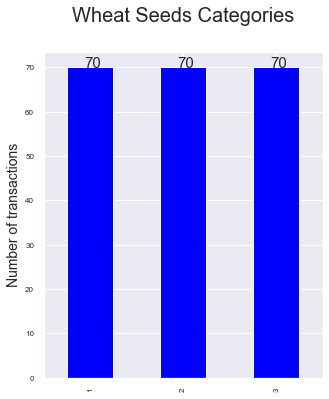

In [265]:
ax = df["Class"].value_counts().plot(kind='bar', figsize=(5, 6), fontsize=8, color='blue')
ax.set_title('Wheat Seeds Categories', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height(), str(round(i.get_height(), 2)), fontsize=15)

    It appears that the data has a relatively good balance between the categories of the target column, and therefore we will not manipulate, this is natural balance.

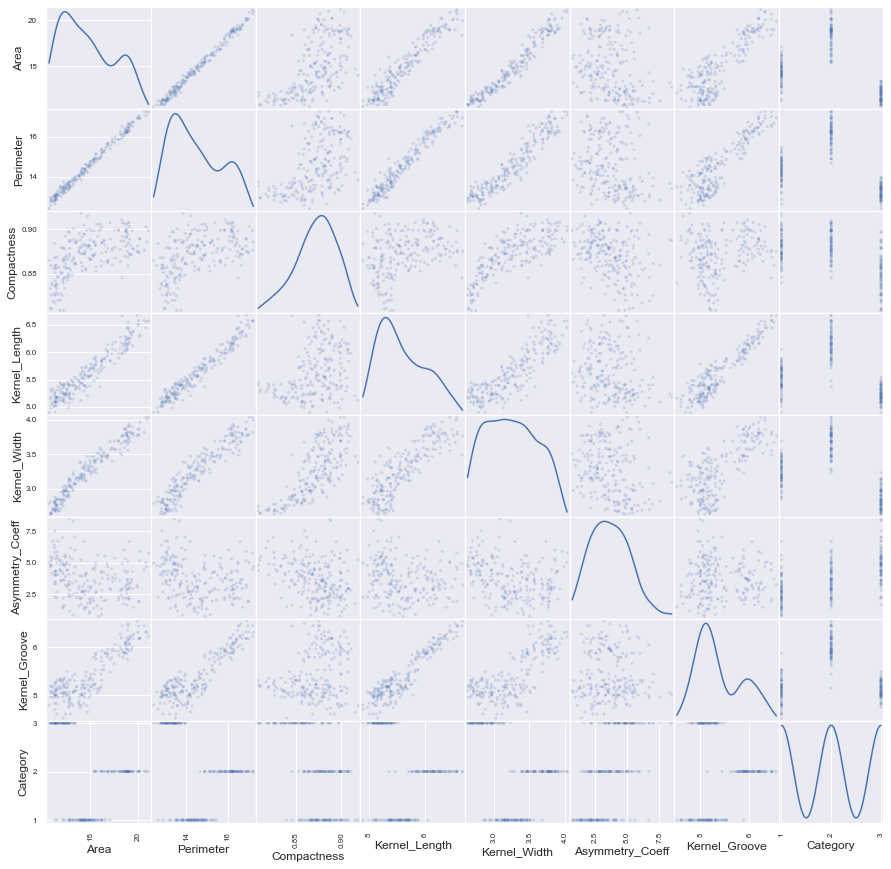

In [314]:
# Create a scatter matrix of the dataframe features
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

<AxesSubplot:>

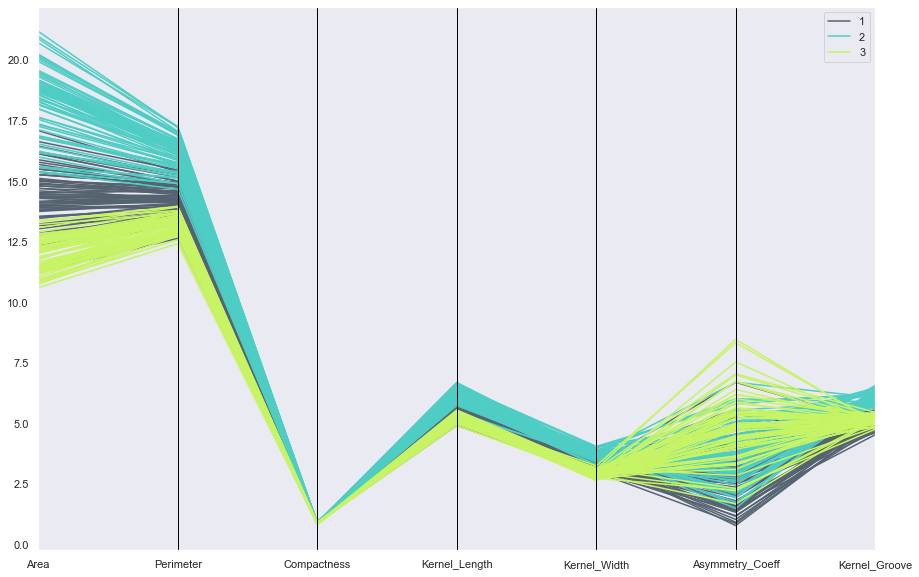

In [321]:
# Parallel Coordinates Chart
pd.plotting.parallel_coordinates(
    df, 'Category', color=('#556270', '#4ECDC4', '#C7F464'))

<AxesSubplot:>

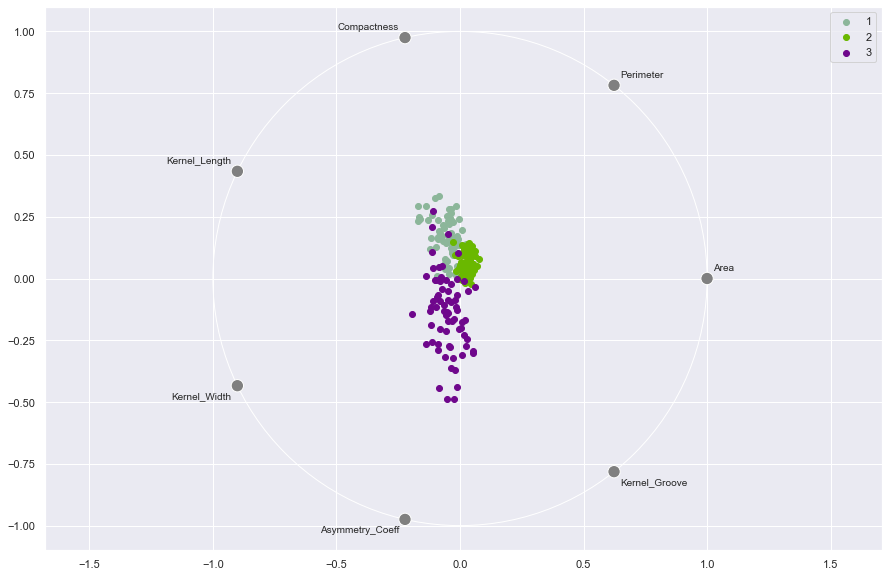

In [322]:
# radviz for features
pd.plotting.radviz(df, 'Category')

### Identify Highly Correlated Features      

In [266]:
pear_corr=df.corr(method='pearson')
pear_corr

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
Compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
Kernel Length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
Kernel Width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
Asymmetry Coefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
Kernel Groove Length,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Class,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


<AxesSubplot:>

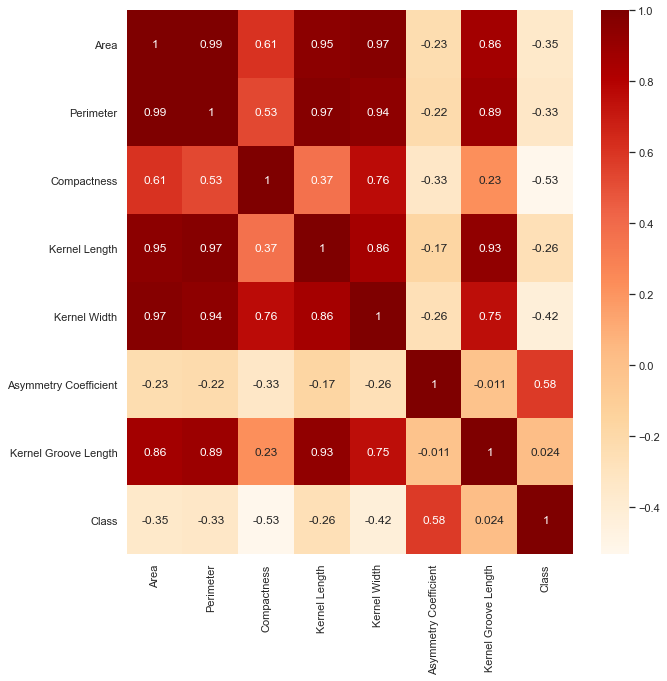

In [267]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(pear_corr, cmap="OrRd", annot=True)

In [268]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [269]:
to_drop

['Perimeter', 'Kernel Length', 'Kernel Width']

***Drop Marked Features***

If we add so much correlated features to the model we may cause the model to consider unnecessary features and we may have curse of high dimensionality problem

** Show the different clusters distribution within our dataset **

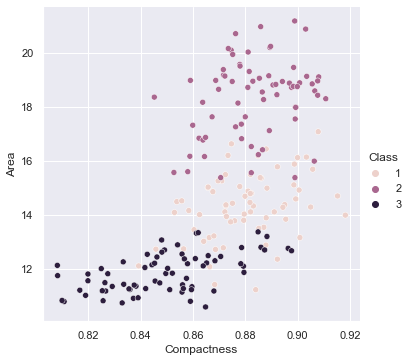

In [270]:
sns.relplot(x='Compactness', y='Area', hue='Class', data=df);

## 2.  Data Pre-processing and Cleaning

Replace header column names and the values of category to a more meaningfull names

In [271]:
df.columns=['Area', 'Perimeter', 'Compactness', 'Kernel_Length','Kernel_Width', 'Asymmetry_Coeff','Kernel_Groove' , 'Category']
df.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


let's check the Duplicate value

In [272]:
df.duplicated().sum()

0

No duplicate record present in the dataset

***Lets check missing value***

<AxesSubplot:>

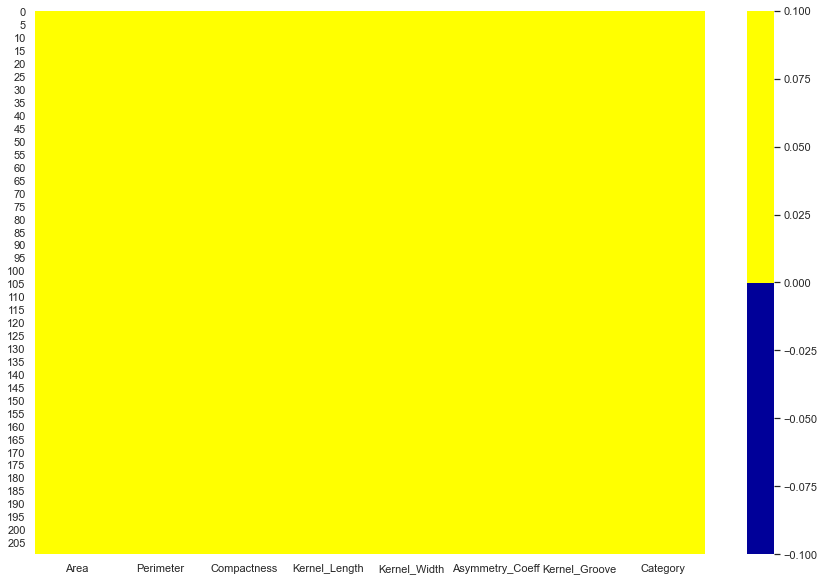

In [273]:
sns.set(rc={'figure.figsize':(15,10)})
cols =df.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

We don't have any missing value

In [274]:
# Check dataset outliers

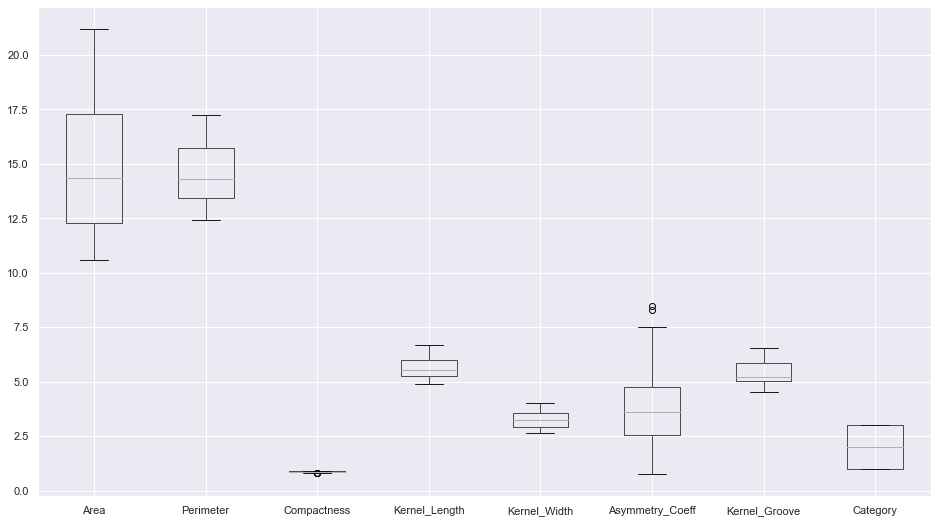

In [275]:
# dealing with outliers values
df.boxplot(figsize=(16,9));

**Through the schematics that we fortified, we notice the presence of extreme values,
Outliers work to affect the algorithms that we will build negatively because the difference between the lowest value and the largest value in each column is a large difference and thus a dispersion of the model occurs.**

**But we know very well that the decision to get rid of outliers is a decision that must be a well-thought-out decision, and in most cases we consult specialists in the case of these data, we have to consult a specialist in the Agriculture field, specifically.**

**But that process is not currently available to us because we are working on ready data, so we will leave that step as it is and move on to the next step.**

In [276]:
df=df.dropna()

** Data Splitting **

In [277]:
# Here we perform an initial separation of the data, specifically the target column from the rest of the columns.
target=df["Category"]
features=df.drop(["Category"],axis=1)

** Data Transformation **

All data elemnts are numerical, no label data present. Therefore no transformation needed.

** Data Scalling **

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, hereitis  between zero and one.

In [278]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)

MinMaxScaler()

In [279]:
new_features = scaler.transform(features)
print(new_features)

[[0.44098206 0.50206612 0.5707804  ... 0.48610121 0.18930164 0.34515017]
 [0.40509915 0.44628099 0.66243194 ... 0.50106914 0.03288302 0.21516494]
 [0.34938621 0.34710744 0.87931034 ... 0.50392017 0.25145302 0.1506647 ]
 ...
 [0.24645892 0.25826446 0.7277677  ... 0.42908054 0.98166664 0.26440177]
 [0.11803588 0.16528926 0.39927405 ... 0.14682823 0.36834441 0.25849335]
 [0.16147309 0.19214876 0.54718693 ... 0.24518888 0.63346292 0.26784835]]


In [280]:
print(new_features.shape)

(210, 7)


 ## 3.Model Building

**Split the dataset into training and test sets.**

data splitting is typically done to avoid overfitting/underfitting. That is an instance where a machine learning model fits its training data too well and fails to reliably fit additional data. 

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

*** Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ;
[ x_test1,y_test1] = 20% ;***

In [281]:
# Complete the data separation. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_features,y,test_size=0.8,random_state=0)

In [282]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(42, 7) (168, 7) (42,) (168,)


# Decision tree classifier

In [283]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

** perform training with entropy **

In [284]:
clf_entrophy = DecisionTreeClassifier( min_samples_split=7 , criterion = 'entropy' )

In [285]:
clf_entrophy.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=7)

** Make Prediction using the test data **

In [286]:
y_pred1 = clf_entrophy.predict(x_test)

** Check Decision Tree Accuracy **

In [287]:
print("Accuracy of Decision Tree Prediction:" + str(accuracy_score(y_true = y_test , y_pred = y_pred1)))

Accuracy of Decision Tree Prediction:0.8035714285714286


# Visualize our decision tree Structure - Entropy

Text(0.5, 1.0, 'Decision tree training for training dataset')

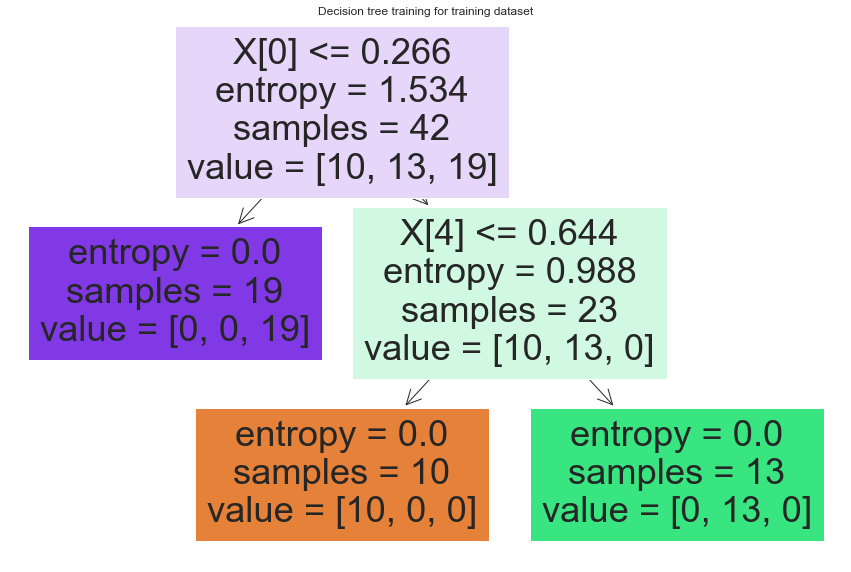

In [288]:
tree.plot_tree(clf_entrophy,filled=True);
plt.title("Decision tree training for training dataset")

# Evaluating Decision tree for multiclass classification using confusion matrix

Train Accuracy 1.0


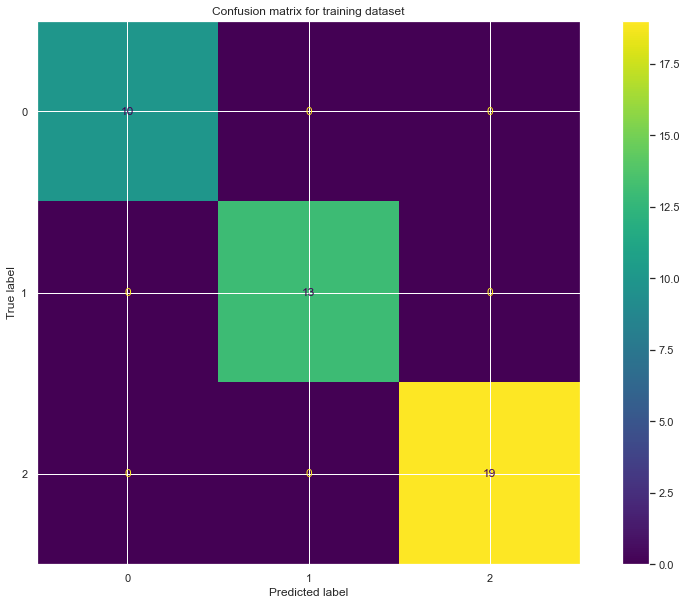

In [289]:
from sklearn.metrics import roc_curve, auc, accuracy_score,confusion_matrix,ConfusionMatrixDisplay
y_train_pred1=clf_entrophy.predict(x_train)
ytrain = np.array(y_train)
# Print train accuracy
print("Train Accuracy", accuracy_score(y_train_pred1,ytrain))
# Plot the confusion matrix in graph
cm = confusion_matrix(y_train,y_train_pred1, labels=clf_entrophy.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_entrophy.classes_)
disp.plot()

# showing the matrix
plt.title("Confusion matrix for training dataset")
plt.show()

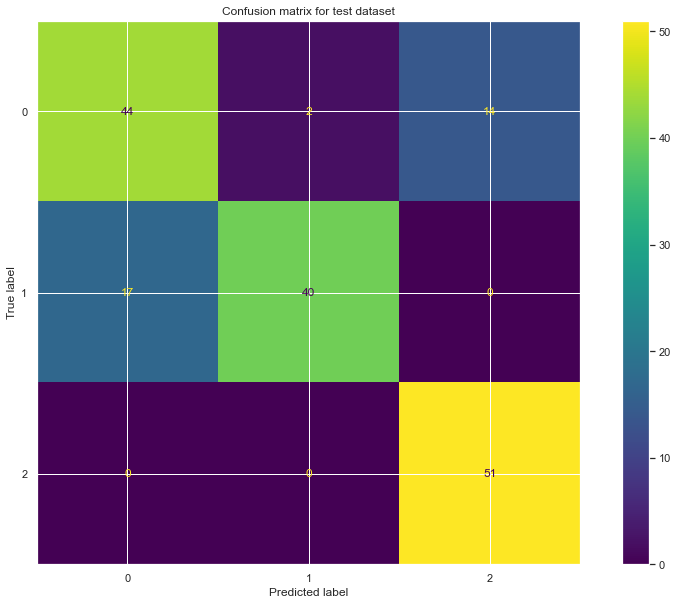

In [290]:
# Predicting test results
# calc confusion matrix
y_test_predict1 = clf_entrophy.predict(x_test)
# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_test_predict1, labels=clf_entrophy.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_entrophy.classes_)
disp.plot()

# showing the matrix
plt.title("Confusion matrix for test dataset")
plt.show()

***classification report***

In [291]:
print("With Entropy\n",classification_report(y_test, y_test_predict1))

With Entropy
               precision    recall  f1-score   support

           0       0.72      0.73      0.73        60
           1       0.95      0.70      0.81        57
           2       0.78      1.00      0.88        51

    accuracy                           0.80       168
   macro avg       0.82      0.81      0.80       168
weighted avg       0.82      0.80      0.80       168



** perform training with gini index **

In [292]:
clf_gini = DecisionTreeClassifier( min_samples_split=7 , criterion = 'gini' )

In [293]:
clf_gini.fit(x_train , y_train)

DecisionTreeClassifier(min_samples_split=7)

** Make Prediction using the test data **

In [294]:
y_pred2 = clf_gini.predict(x_test)

** Check Decision Tree Accuracy **

In [295]:
print("Accuracy of Decision Tree Prediction:" + str(accuracy_score(y_true = y_test , y_pred = y_pred2)))

Accuracy of Decision Tree Prediction:0.8452380952380952


# Visualize our decision tree Structure - Gini

Text(0.5, 1.0, 'Decision tree training for training dataset')

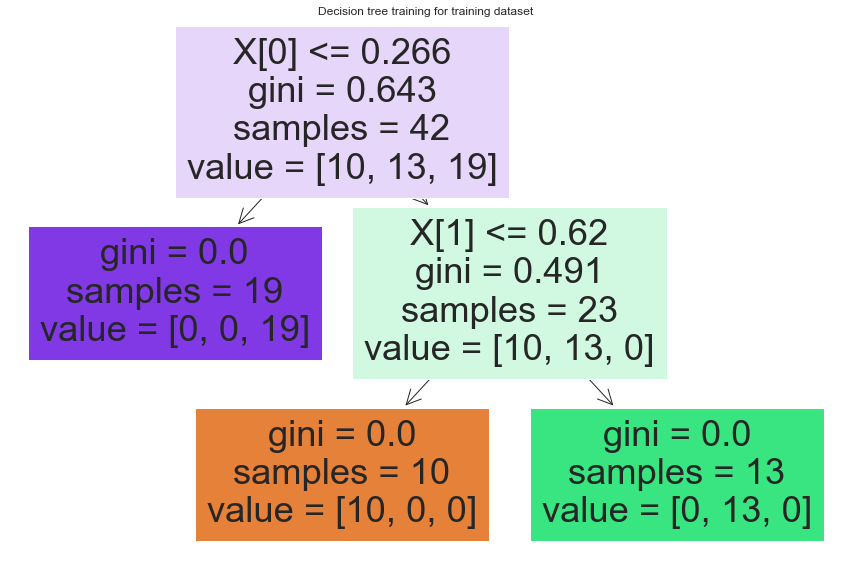

In [296]:
tree.plot_tree(clf_gini,filled=True);
plt.title("Decision tree training for training dataset")

# Evaluating Decision tree for multiclass classification using confusion matrix - Gini

Train Accuracy 1.0


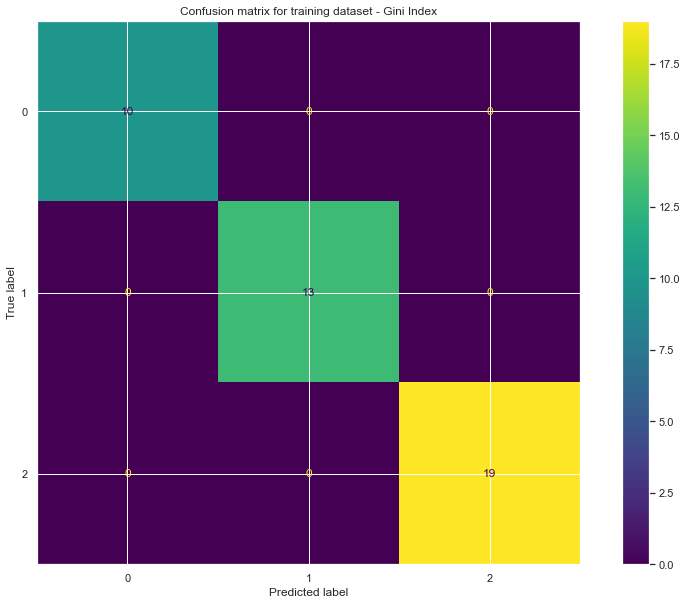

In [297]:
y_train_pred2=clf_gini.predict(x_train)
ytrain = np.array(y_train)
# Print train accuracy
print("Train Accuracy", accuracy_score(y_train_pred2,ytrain))
# Plot the confusion matrix in graph
cm = confusion_matrix(y_train,y_train_pred2, labels=clf_gini.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_gini.classes_)
disp.plot()

# showing the matrix
plt.title("Confusion matrix for training dataset - Gini Index")
plt.show()

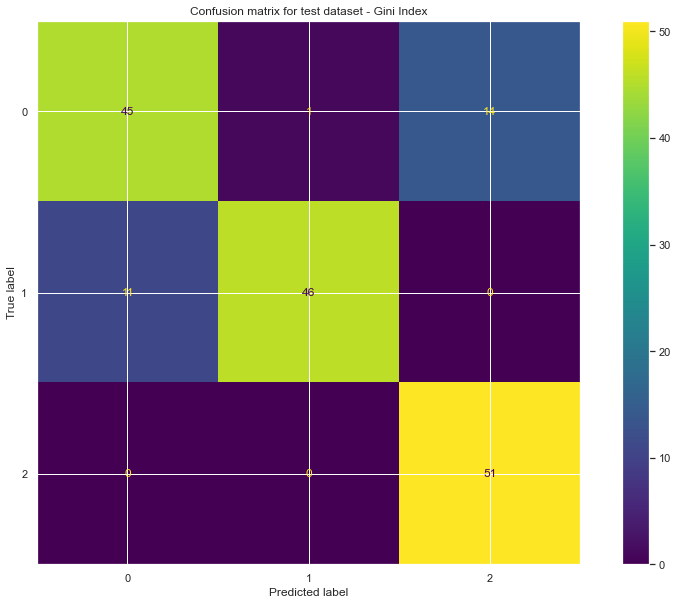

In [298]:
# Predicting test results
# calc confusion matrix
y_test_predict2 = clf_gini.predict(x_test)
# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_test_predict2, labels=clf_gini.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_gini.classes_)
disp.plot()

# showing the matrix
plt.title("Confusion matrix for test dataset - Gini Index")
plt.show()

In [299]:
print("With Gini Index\n",classification_report(y_test, y_test_predict2))

With Gini Index
               precision    recall  f1-score   support

           0       0.80      0.75      0.78        60
           1       0.98      0.81      0.88        57
           2       0.78      1.00      0.88        51

    accuracy                           0.85       168
   macro avg       0.86      0.85      0.85       168
weighted avg       0.86      0.85      0.84       168



# KNN Classifier

In [300]:
from sklearn.neighbors import KNeighborsClassifier

In [301]:
# Let's Create KNN model instance with n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

In [302]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [303]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(n_neighbors=1)

In [304]:
y_pred1 = knn.predict(x_test)

** Check KNN accuracy **

In [305]:
print("Accuracy of KNN Prediction:" + str(accuracy_score(y_true = y_test , y_pred = y_pred1)))

Accuracy of KNN Prediction:0.8511904761904762


# Evaluating KNN for multiclass classification using confusion matrix

Train Accuracy 1.0


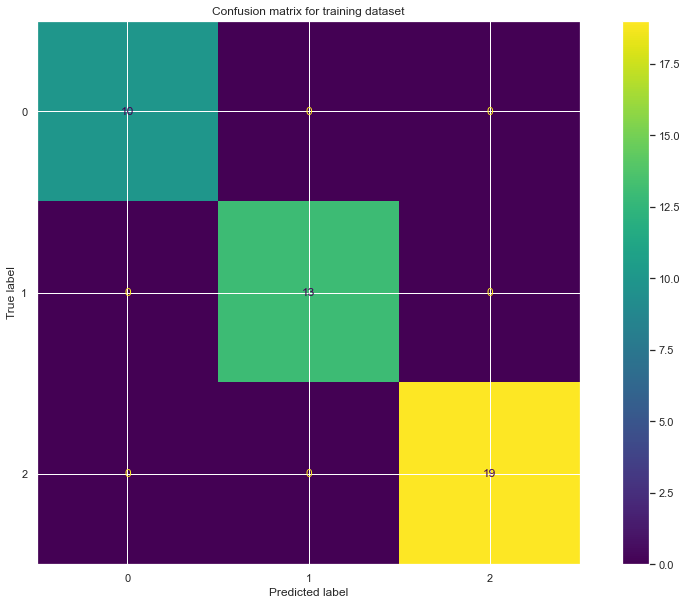

In [306]:
from sklearn.metrics import roc_curve, auc, accuracy_score,confusion_matrix,ConfusionMatrixDisplay
y_train_pred1=knn.predict(x_train)
ytrain1 = np.array(y_train)
# Print train accuracy
print("Train Accuracy", accuracy_score(y_train_pred1,ytrain1))
# Plot the confusion matrix in graph
cm = confusion_matrix(ytrain1,y_train_pred1, labels=knn.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

# showing the matrix
plt.title("Confusion matrix for training dataset")
plt.show()

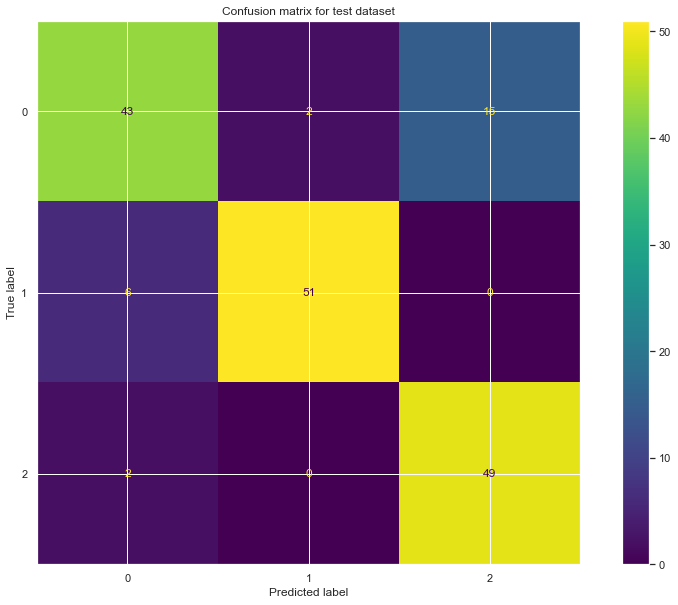

In [307]:
# Predicting test results
# calc confusion matrix
y_test_predict1 = knn.predict(x_test)
# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_test_predict1, labels=knn.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

# showing the matrix
plt.title("Confusion matrix for test dataset")
plt.show()

***classification report***

In [308]:
print(classification_report(y_test, y_test_predict1))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77        60
           1       0.96      0.89      0.93        57
           2       0.77      0.96      0.85        51

    accuracy                           0.85       168
   macro avg       0.86      0.86      0.85       168
weighted avg       0.86      0.85      0.85       168



Eblow Method is used to find out good value of K We will get the error rate for every K value and plot against k to find out its optimum state/values

In [309]:
 #Initializing an empty list to get error rate for K
err_rate = [] 

# Now Run for loop K from 1 to 30 

for i in range(1,30):

  #Initialize knn for k =i 

  knn=KNeighborsClassifier(n_neighbors=1)

  # fitting knn

  knn.fit(x_train,y_train)

  #Predicting for K 

  predictions_i = knn.predict(x_test)

  err_rate.append(np.mean(predictions_i != y_test))

Text(0, 0.5, 'Error_Rate')

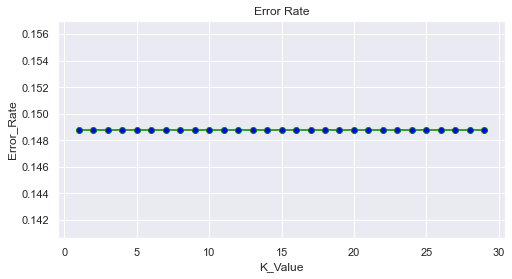

In [310]:
plt.figure(figsize=(8,4))
plt.plot(range(1,30),err_rate,color='green',
         marker='o',markerfacecolor='blue')
plt.title('Error Rate')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')

## 4. Performance Evaluation

In [311]:
!pip install PrettyTable

In [312]:
from prettytable import PrettyTable
 
x = PrettyTable()
x.field_names = ["Model","Criteria", "Test Accuracy%"]
x.add_row(["Decision Tree","Gini Index",87])
x.add_row(["Decision Tree", "Entrophy", 82])
x.add_row(["KNN", "Elbow method", 85])
print('Result of Decision Tree and KNN ')
print(x)

Result of Decision Tree and KNN 
+---------------+--------------+----------------+
|     Model     |   Criteria   | Test Accuracy% |
+---------------+--------------+----------------+
| Decision Tree |  Gini Index  |       87       |
| Decision Tree |   Entrophy   |       82       |
|      KNN      | Elbow method |       85       |
+---------------+--------------+----------------+


Decision Tree model with Gini Index criteria gives us best accuracy among the models.